<a href="https://colab.research.google.com/github/AradHamidSamiee/PyOpenCV/blob/master/PyOpenCV_with_googleColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this tutorial, we will see how to getting started with python3 OpenCV v.4

# Read, Display, and Write an image

In [2]:
import numpy as np
import cv2
import urllib.request
import matplotlib.pyplot as plt
print("OpenCV-Python Version %s" % cv2.__version__)

OpenCV-Python Version 4.1.2


In [ ]:
req = urllib.request.urlopen('https://raw.githubusercontent.com/opencv/opencv/master/samples/data/messi5.jpg')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
messi = cv2.imdecode(arr, cv2.IMREAD_COLOR)
# messi = cv2.imread('messi5.png')

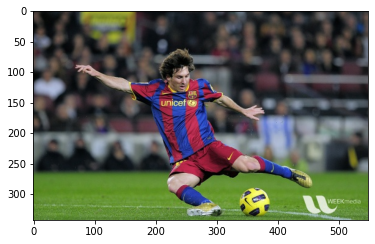

In [ ]:
# display an image using matplotlib
# plt.imshow(img) shown an image with wrong colorspace
plt.imshow(cv2.cvtColor(messi, cv2.COLOR_BGR2RGB))

In [ ]:
cv2.imwrite('messi.png',messi)

True

In [ ]:
!ls

messi.png  sample_data


# Drawing Functions in OpenCV

In [ ]:
# Create a black image
img = np.zeros((512,512,3), np.uint8)

# Draw a diagonal blue line with thickness of 5 px
img = cv2.line(img,(0,0),(511,511),(255,0,0),5)

In [ ]:
# Drawing Rectangle
img = cv2.rectangle(img,(384,0),(510,128),(0,255,0),3)

# Drawing Circle
img = cv2.circle(img,(447,63), 63, (0,0,255), -1)

# Drawing Ellipse
img = cv2.ellipse(img,(256,256),(100,50),0,0,180,255,-1)

# Drawing Polygon
pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
pts = pts.reshape((-1,1,2))
img = cv2.polylines(img,[pts],True,(0,255,255))

In [ ]:
# Adding Text to Images
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'OpenCV',(10,500), font, 4,(255,255,255),2,cv2.LINE_AA)

array([[[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]]

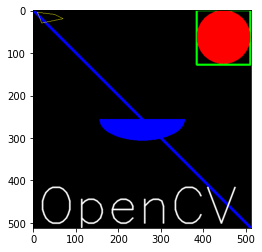

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Basic Operations on Images

In [ ]:
# Accessing and Modifying pixel values
px = messi[100,100]
print(px)
messi[100,100] = [255,255,255]
print(messi[100,100])

[157 166 200]
[255 255 255]


In [ ]:
# Change pixel values
for i in range(5):
    for j in range(5):
        messi[50+i, 235+j] = (0, 255, 0)

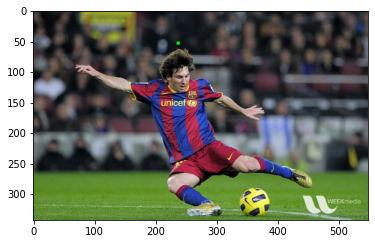

In [ ]:
plt.imshow(cv2.cvtColor(messi, cv2.COLOR_BGR2RGB))

In [ ]:
# Accessing Image Properties
print(messi.shape)
print(messi.size)
print(messi.dtype)

(342, 548, 3)
562248
uint8


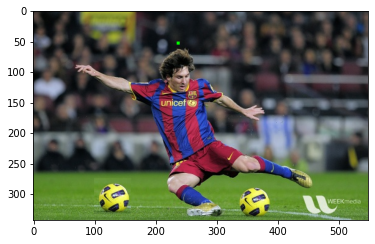

In [ ]:
# Image ROI
ball = messi[280:340, 330:390]
messi[273:333, 100:160] = ball

plt.imshow(cv2.cvtColor(messi, cv2.COLOR_BGR2RGB))

In [ ]:
# Splitting and Merging Image Channels
b,g,r = cv2.split(messi)
messi = cv2.merge((b,g,r))

print(b)

[[39 42 44 ... 57 55 52]
 [37 42 46 ... 62 60 57]
 [41 46 51 ... 64 63 60]
 ...
 [56 48 49 ... 60 63 73]
 [54 59 50 ... 56 69 64]
 [45 58 71 ... 49 52 51]]


In [ ]:
b = img[:,:,0]

print(b)

[[255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 ...
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]]


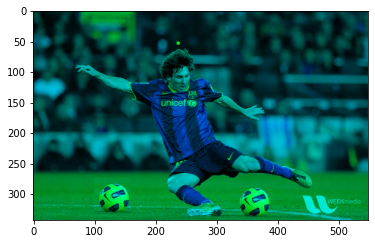

In [ ]:
messi[:,:,2] = 0

plt.imshow(cv2.cvtColor(messi, cv2.COLOR_BGR2RGB))

# Making Borders for Images (Padding)

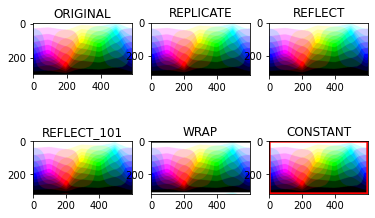

In [ ]:
BLUE = [255,0,0]

# https://www.google.com/images/branding/googlelogo/1x/googlelogo_color_272x92dp.png
# https://static01.nyt.com/images/2020/04/14/science/06NASA1/06NASA1-mediumSquareAt3X.jpg
# https://lh3.googleusercontent.com/proxy/-5RSjRvZft5v3x_8O_bgeHLfvbpW4GqROZ4_Z5LV1asCvPpSmF6-ILrcF8qlSvneAXUYvFbq-hIdVGIqYFo3Hdc1CvY4pFhmDk-bDKjur5Ovvw
# https://cdn.cambridgeincolour.com/images/tutorials/bitdepth_08bpp_580.png

req = urllib.request.urlopen('https://cdn.cambridgeincolour.com/images/tutorials/bitdepth_08bpp_580.png')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img1 = cv2.imdecode(arr, cv2.IMREAD_COLOR)

replicate = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_CONSTANT,value=BLUE)

plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')

plt.show()

# Arithmetic Operations on Images

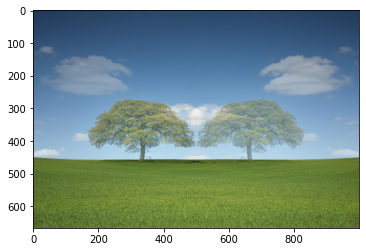

In [10]:
# Image Addition

# https://raw.githubusercontent.com/opencv/opencv/master/samples/data/ml.png
# https://live.staticflickr.com/3345/5694456766_ab35fba2d8_b.jpg

req = urllib.request.urlopen('https://live.staticflickr.com/3345/5694456766_ab35fba2d8_b.jpg')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img1 = cv2.imdecode(arr, cv2.IMREAD_COLOR)
img2 = cv2.flip(img1, 1)

dst = cv2.addWeighted(img1,0.4,img2,.6,0)

plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

# Image Thresholding

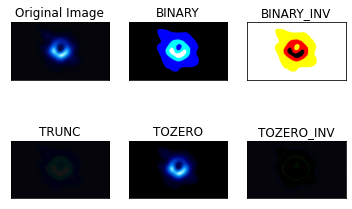

In [ ]:
# Simple Thresholding

# https://cdn.cambridgeincolour.com/images/tutorials/bitdepth_08bpp_580.png
# https://raw.githubusercontent.com/opencv/opencv/master/samples/data/gradient.png
# https://cdn.eso.org/images/thumb300y/eso1907a.jpg

req = urllib.request.urlopen('https://cdn.eso.org/images/thumb300y/eso1907a.jpg')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, cv2.IMREAD_COLOR)
ret,thresh1 = cv2.threshold(img,20,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,20,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,20,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,20,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,20,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

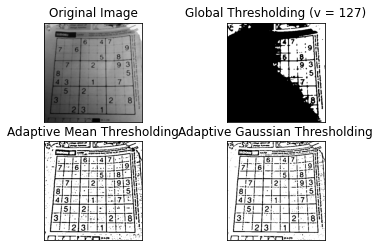

In [ ]:
# Adaptive Thresholding
req = urllib.request.urlopen('https://aishack.in/static/img/tut/sudoku-original.jpg')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# Geometric Transformations of Images

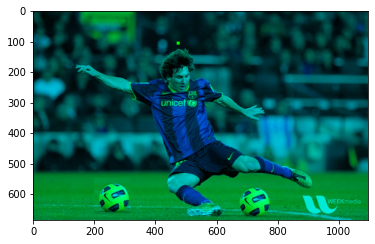

In [ ]:
# Scaling
res = cv2.resize(messi,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

In [ ]:
img.shape

(423, 419)

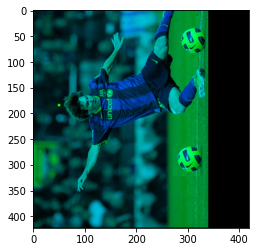

In [ ]:
# Rotation
rows,cols = img.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
dst = cv2.warpAffine(messi,M,(cols,rows))

plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

<p align="center">
<img src="https://opencv-python-tutroals.readthedocs.io/en/latest/_images/math/f3a6bed945808a1f3a9df71b260f68f8e653af95.png"/>
</p>

<p align="center">
<img src="https://opencv-python-tutroals.readthedocs.io/en/latest/_images/math/91ff2b9b1db0760f4764631010749e594cdf5f5f.png"/>
</p>

<p align="center">
<img src="https://opencv-python-tutroals.readthedocs.io/en/latest/_images/math/383c254fc602c57a059a8296357f90fdf421aee7.png"/>
</p>

```python
# Affine Transformation sample
img = cv2.imread('drawing.png')
rows,cols,ch = img.shape

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(img,M,(cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()
```

<p align="center">
<img src="https://opencv-python-tutroals.readthedocs.io/en/latest/_images/affine.jpg"/>
</p>

```python
# Perspective Transformation sample
img = cv2.imread('sudokusmall.png')
rows,cols,ch = img.shape

pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(300,300))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()
```

<p align="center">
<img src="https://opencv-python-tutroals.readthedocs.io/en/latest/_images/perspective.jpg"/>
</p>

# Smoothing Images

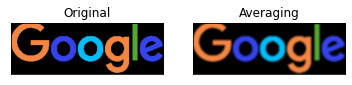

In [ ]:
# 2D Convolution ( Image Filtering )
req = urllib.request.urlopen('https://www.google.com/images/branding/googlelogo/1x/googlelogo_color_272x92dp.png')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, cv2.IMREAD_COLOR)

kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

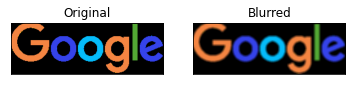

In [ ]:
# Image Blurring (Image Smoothing)
# Averaging
req = urllib.request.urlopen('https://www.google.com/images/branding/googlelogo/1x/googlelogo_color_272x92dp.png')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, cv2.IMREAD_COLOR)

blur = cv2.blur(img,(5,5))

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

```python
# Gaussian Filtering
blur = cv2.GaussianBlur(img,(5,5),0)

# Median Filtering (highly effective in removing salt-and-pepper noise)
median = cv2.medianBlur(img,5)
```

<p align="center">
<img src="https://opencv-python-tutroals.readthedocs.io/en/latest/_images/median.jpg"/>
</p>

```python
# Bilateral Filtering
blur = cv2.bilateralFilter(img,9,75,75)
```

# Morphological Transformations

<p align="center">
<img src="https://opencv-python-tutroals.readthedocs.io/en/latest/_images/j.png"/>
</p>

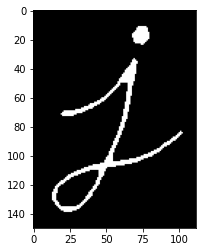

In [ ]:
# Erosion
req = urllib.request.urlopen('https://docs.opencv.org/3.0-beta/_images/j.png')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, cv2.IMREAD_COLOR)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)

plt.imshow(cv2.cvtColor(erosion, cv2.COLOR_BGR2RGB))

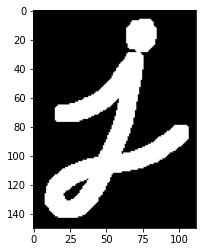

In [ ]:
# Dilation
req = urllib.request.urlopen('https://docs.opencv.org/3.0-beta/_images/j.png')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, cv2.IMREAD_COLOR)
kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(img,kernel,iterations = 1)

plt.imshow(cv2.cvtColor(dilation, cv2.COLOR_BGR2RGB))

<p align="center">
<img src="https://opencv-python-tutroals.readthedocs.io/en/latest/_images/opening.png"/>
</p>

<p align="center">
<img src="https://opencv-python-tutroals.readthedocs.io/en/latest/_images/closing.png"/>
</p>

# Image Gradients
##### Laplacian Derivatives
<p align="center">
<img src="https://opencv-python-tutroals.readthedocs.io/en/latest/_images/math/2e4e208edcbed72b60c09a9e8eb8c00c4b21dbd6.png"/>
</p>

```python
img = cv2.imread('dave.jpg',0)

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()
```

<p align="center">
<img src="https://opencv-python-tutroals.readthedocs.io/en/latest/_images/gradients.jpg"/>
</p>

# Edge Detection

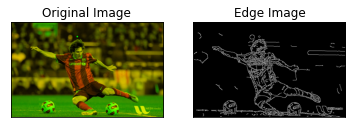

In [ ]:
# Canny Edge Detection

edges = cv2.Canny(messi,100,200)

plt.subplot(121),plt.imshow(messi,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

# Contours

```python
im = cv2.imread('test.jpg')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
```

<p align="center">
<img src="https://opencv-python-tutroals.readthedocs.io/en/latest/_images/extremepoints.jpg"/>
</p>

# Histograms

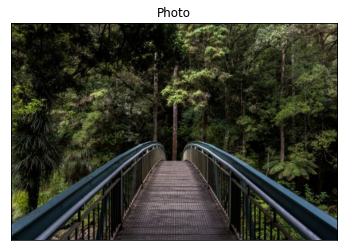

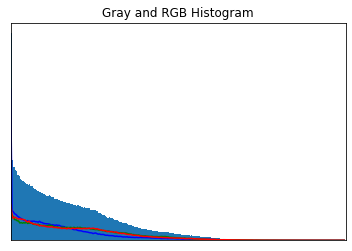

In [ ]:
# https://upload.wikimedia.org/wikipedia/commons/8/8f/%24700%2C000_Home.jpg
# https://www.gettyimages.pt/gi-resources/images/Homepage/Hero/PT/PT_hero_42_153645159.jpg
# https://www.w3schools.com/w3css/img_forest.jpg

req = urllib.request.urlopen('https://www.w3schools.com/w3css/img_forest.jpg')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, cv2.IMREAD_COLOR)

plt.figure()
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Photo'), plt.xticks([]), plt.yticks([])
plt.figure()
plt.hist(img.ravel(),256,[0,256])
plt.title('Gray and RGB Histogram'), plt.xticks([]), plt.yticks([])
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

# Histogram Equalization

```python
img = cv2.imread('wiki.jpg',0)

hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()
```

<p align="center">
<img src="https://opencv-python-tutroals.readthedocs.io/en/latest/_images/histeq_numpy1.jpg"/>
</p>

<p align="center">
<img src="https://opencv-python-tutroals.readthedocs.io/en/latest/_images/histeq_numpy2.jpg"/>
</p>

# 2D Histograms

```python
img = cv2.imread('home.jpg')
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
hist = cv2.calcHist( [hsv], [0, 1], None, [180, 256], [0, 180, 0, 256] )

plt.imshow(hist,interpolation = 'nearest')
plt.show()
```

<p align="center">
<img src="https://opencv-python-tutroals.readthedocs.io/en/latest/_images/2dhist_matplotlib.jpg"/>
</p>

# Fourier Transform
```python
img = cv2.imread('messi5.jpg',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()
```

<p align="center">
<img src="https://opencv-python-tutroals.readthedocs.io/en/latest/_images/fft1.jpg"/>
</p>

```python
rows, cols = img.shape
crow,ccol = rows/2 , cols/2

# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()
```

<p align="center">
<img src="https://opencv-python-tutroals.readthedocs.io/en/latest/_images/fft4.jpg"/>
</p>

# Why Laplacian is a High Pass Filter?

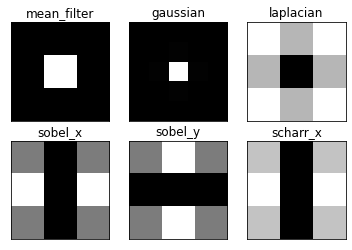

In [ ]:
# simple averaging filter without scaling parameter
mean_filter = np.ones((3,3))

# creating a guassian filter
x = cv2.getGaussianKernel(5,10)
gaussian = x*x.T

# different edge detecting filters
# scharr in x-direction
scharr = np.array([[-3, 0, 3],
                   [-10,0,10],
                   [-3, 0, 3]])
# sobel in x direction
sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
# sobel in y direction
sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])
# laplacian
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])

filters = [mean_filter, gaussian, laplacian, sobel_x, sobel_y, scharr]
filter_name = ['mean_filter', 'gaussian','laplacian', 'sobel_x', \
                'sobel_y', 'scharr_x']
fft_filters = [np.fft.fft2(x) for x in filters]
fft_shift = [np.fft.fftshift(y) for y in fft_filters]
mag_spectrum = [np.log(np.abs(z)+1) for z in fft_shift]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(mag_spectrum[i],cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])

plt.show()

# Template Matching
```python
img_rgb = cv2.imread('mario.png')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('mario_coin.png',0)
w, h = template.shape[::-1]

res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

cv2.imwrite('res.png',img_rgb)
```

<p align="center">
<img src="https://opencv-python-tutroals.readthedocs.io/en/latest/_images/res_mario.jpg"/>
</p>

# Understanding Features

<p align="center">
<img src="https://opencv-python-tutroals.readthedocs.io/en/latest/_images/feature_building.jpg"/>
</p>

<p align="center">
<img src="https://opencv-python-tutroals.readthedocs.io/en/latest/_images/feature_simple.png"/>
</p>

# Harris Corner Detection
```python
filename = 'chessboard.jpg'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]

cv2.imshow('dst',img)
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()
```

<p align="center">
<img src="https://opencv-python-tutroals.readthedocs.io/en/latest/_images/harris_result.jpg"/>
</p>

# SIFT (Scale-Invariant Feature Transform)
```python
img = cv2.imread('home.jpg')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT()
kp = sift.detect(gray,None)

img=cv2.drawKeypoints(gray,kp)

cv2.imwrite('sift_keypoints.jpg',img)
```

<p align="center">
<img src="https://opencv-python-tutroals.readthedocs.io/en/latest/_images/sift_keypoints.jpg"/>
</p>

# Feature Matching
```python
# Brute-Force Matching with ORB Descriptors
img1 = cv2.imread('box.png',0)          # queryImage
img2 = cv2.imread('box_in_scene.png',0) # trainImage

# Initiate SIFT detector
orb = cv2.ORB()

# find the keypoints and descriptors with SIFT
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10], flags=2)

plt.imshow(img3),plt.show()
```

<p align="center">
<img src="https://opencv-python-tutroals.readthedocs.io/en/latest/_images/matcher_result1.jpg"/>
</p>

```python
# Brute-Force Matching with SIFT Descriptors and Ratio Test
import numpy as np
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('box.png',0)          # queryImage
img2 = cv2.imread('box_in_scene.png',0) # trainImage

# Initiate SIFT detector
sift = cv2.SIFT()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,flags=2)

plt.imshow(img3),plt.show()
```

<p align="center">
<img src="https://opencv-python-tutroals.readthedocs.io/en/latest/_images/matcher_result2.jpg"/>
</p>

# Optical Flow
```python
# Lucas-Kanade Optical Flow
cap = cv2.VideoCapture('slow.flv')

# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )

# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# Create some random colors
color = np.random.randint(0,255,(100,3))

# Take first frame and find corners in it
ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(old_gray, mask = None, **feature_params)

# Create a mask image for drawing purposes
mask = np.zeros_like(old_frame)

while(1):
    ret,frame = cap.read()
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # calculate optical flow
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)

    # Select good points
    good_new = p1[st==1]
    good_old = p0[st==1]

    # draw the tracks
    for i,(new,old) in enumerate(zip(good_new,good_old)):
        a,b = new.ravel()
        c,d = old.ravel()
        mask = cv2.line(mask, (a,b),(c,d), color[i].tolist(), 2)
        frame = cv2.circle(frame,(a,b),5,color[i].tolist(),-1)
    img = cv2.add(frame,mask)

    cv2.imshow('frame',img)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

    # Now update the previous frame and previous points
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1,1,2)

cv2.destroyAllWindows()
cap.release()
```

<p align="center">
<img src="https://opencv-python-tutroals.readthedocs.io/en/latest/_images/opticalflow_lk.jpg"/>
</p>

```python
# Dense Optical Flow
import cv2
import numpy as np
cap = cv2.VideoCapture("vtest.avi")

ret, frame1 = cap.read()
prvs = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
hsv = np.zeros_like(frame1)
hsv[...,1] = 255

while(1):
    ret, frame2 = cap.read()
    next = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)

    flow = cv2.calcOpticalFlowFarneback(prvs,next, None, 0.5, 3, 15, 3, 5, 1.2, 0)

    mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
    hsv[...,0] = ang*180/np.pi/2
    hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
    rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)

    cv2.imshow('frame2',rgb)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
    elif k == ord('s'):
        cv2.imwrite('opticalfb.png',frame2)
        cv2.imwrite('opticalhsv.png',rgb)
    prvs = next

cap.release()
cv2.destroyAllWindows()
```

<p align="center">
<img src="https://opencv-python-tutroals.readthedocs.io/en/latest/_images/opticalfb.jpg"/>
</p>

# Background Subtraction
```python
# BackgroundSubtractorMOG
cap = cv2.VideoCapture('vtest.avi')

fgbg = cv2.createBackgroundSubtractorMOG()

while(1):
    ret, frame = cap.read()

    fgmask = fgbg.apply(frame)

    cv2.imshow('frame',fgmask)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()
```

<p align="center">
<img src="https://opencv-python-tutroals.readthedocs.io/en/latest/_images/resframe.jpg"/>
</p>

<p align="center">
<img src="https://opencv-python-tutroals.readthedocs.io/en/latest/_images/resmog.jpg"/>
</p>

# Depth Map from Stereo Images
```python
imgL = cv2.imread('tsukuba_l.png',0)
imgR = cv2.imread('tsukuba_r.png',0)

stereo = cv2.createStereoBM(numDisparities=16, blockSize=15)
disparity = stereo.compute(imgL,imgR)
plt.imshow(disparity,'gray')
plt.show()
```

<p align="center">
<img src="https://opencv-python-tutroals.readthedocs.io/en/latest/_images/disparity_map.jpg"/>
</p>

Author : [FarrokhKarimi](https://zil.ink/farrokhkarimi)  
Reference : [opencv.org](https://opencv.org/)